<h1><b><center>PREDICTING PRICE OF PROCESSOR BASED ON ITS FEATURES</center><b></h1>
    <h2><b><center>COURSE: BACS3013 DATA SCIENCE</center><b></h2>
    <h2><b><center>PROGRAMME: RSF2 Y2S3</center><b></h2>

---

<h3><b><center>TEAM MEMBERS:</center><b></h3>
<center>LIM KAR MUN (18WMR12145)</center>
<center>CHENG CHIN YEOW (18WMR13112)</center>
    
<h3><b><center>TUTOR:</center><b></h3>
<center>DR YU YONG POH</center>

---


# A. Business Understanding 

**Business Objective**<br>
Our project aims to create a predictive model for predicting the price of Intel processors based on its features. This predictive model can be implemented in websites of PC hardware shops. Individuals who benefits from this implementation are the shop owner of PC hardware shops and PC consumers. 

PC hardware shop owners can grow their user base and increase their website traffic by implementing this predictive model to their webpage. By doing so, PC consumers can visit their website and interact with the predictive model to get a prediction of price for the processors that are yet to be released. Instead of showing a static informative page of processor price, this type of interactive content helps increase the return visit rate of website visitors as the prediction of price will be updated continuously when new processors are released. Hence, shop owners get to promote their shop through the growing number of user base.

Besides, PC consumers can utilize this predictive model to detemine whether to buy the soon-to-be released processor or hold off until the next processor with better features and lower price is released. PC consumers can also refer to the predicted price to allocate their budget or save up enough money to buy the new processor.

As different processor brand set up their product market price different, we focus on Intel processors only so that the price prediction is constant and is not influenced by the different market price set by different brands.


In order to build a predictive model for predicting the price of processors, our project focuses on answering the following business questions:
1. Can the price of processor be predicted based on its features with a reasonable accuracy?
2. Which model provides higher accuracy for predicting the price of the processor?
<br><br>

**Assumptions**
* The data for Intel processors is available on the Internet.
* The dataset is credible as it is collected from the official Intel Product Specification website.
* The predictive model only predicts the launch price of the processors as the price of the processor will fluctuate after the initial launch.


**Constraints**
* The number of processor released by Intel may not be large enough hence there is a risk of data overfitting.
<br><br>

**Techniques and Tools Applied in this Project**<br><br>
Methodology used for Data Mining:
* The data mining process for our project follows the Cross Industry Standard Process for Data Mining (Crisp DM) methodology. The report of our project is documented according to the Crisp DM model process where it includes:
    - Business Understanding
    - Data Understanding
    - Data Preparation
    - Modelling
    - Evaluation
    - Deployment
<br>

Tools used in Data Mining:
* Python 3.6 is used as the data mining tool for this project.
    * Python is an open source programming language.
    * Python consists of many useful libraries for data mining.
* Jupyter Notebook is used as an integrated development environment (IDE) to create and run the Python code.
    * Jupyter Notebook as an open-source web-based IDE for Python
    * Supports markdown that enables usage of HTML elements for styling.
<br>

Models used in project modelling:
* K-Nearest Neighbor
* Decision Tree
* Random Forest

<div class="alert alert-block alert-success">
<b>Note:</b> Further elaboration of each model used are discussed in Section D.
</div>

# B. Data Understanding	

In order to predict the price based on each feature of the processor, we have scrapped the necessary data from the [Intel Product Specifications](https://ark.intel.com/content/www/us/en/ark.html) website and recorded them into a table. Only one dataset is needed for our project which is the processors dataset.
	
**Processors dataset:**
* This dataset consists of processors from Intel. Samples were picked from November 2008 to July 2020 and limited edition processors are excluded. A total of 309 data were gathered and 7 features were recorded from each of the samples which are name, speed(GHz), cache(MB), number of cores, number of threads, lithography(nm), and price(USD). The speed(GHz), cache(MB), number of cores, number of threads, lithography(nm), and price(USD) collected are all quantitative data type. The price of some processors are not provided by the official Intel products webpage and cannot be found on the internet, hence it will be dealt later as missing data. 

Below are the description of the processor features we have collected:

||Features|Description|
|:-|:-------|:----------|
|1.|Name | Name of the processor|
|2.|Speed(GHz) | Clock speed of the processor in GHz|
|3.|Cache(MB) | Shared L3 cache of the processor in MB|
|4.|Number of Cores | Number of cores in the processor |
|5.|Number of Threads | Number of threads in the processor, the number of threads depends on the number of cores in the processor where each core consists of two threads.|
|6.|Lithography(nm)  | The average space between the processor's transistor in nm.|
|7.|Price(USD) | Launch price of the processor in USD.|


* The dataset is saved in a csv file named 'Intel.csv'.

<br>

**Improving Data Quality**

Missing Data
* By using the ```pandas.DataFrame.isna().sum()``` function, we found out there were only 3 rows with missing data in the 'Price' column.
* According to Statistics Solutions (n.d.), if the number of missing data is extremely small, such as less than 5% of the sample, researchers can drop them. 
* The missing data in our dataset is less than 5% of the sample, hence the rows with missing data are dropped. 

Outliers
* To reduce the noise in our dataset, outliers in the data have to be handled so the accuracy of the prediction will not be affected.
* Boxplot is used to plot the values of each feature to detect outliers in our dataset.
* Based on the boxplot, many outliers are detected. 
* Due to the large number of outliers in our dataset, these outliers are kept and will be scaled using the Robust Scaler.

# C. Data Preparation

From the processors dataset, the identified target variable of our project is price whereas the input variables are speed, cache, number of cores, number of threads, and lithography. The name column will not be included as our input variable to prevent data leakage. 

The data preprocessing steps applied in this project are:
1. Import the libraries
    - Useful libraries are imported into the project:
        - numpy
        - pandas
        - matplotlib
        - seaborn
        - sklearn
        - os
        - random
        - tensorflow
<br><br>
2. Import the dataset
    - Processor dataset ("Intel.csv") is imported as ```processors```.
    - 'Name' column is removed from the dataset.
    - The header of the features are changed into shorter names without the metrics for ease of access.
    - The 'MB' in the Cache column is removed and its data type is converted to float so they can be used later in the models' calculation in prediction.
    - Each feature of the dataset is plotted into histograms to show the distribution.
<br><br> 
3. Check for missing values and handle them if exist
    - The presence of missing values is checked using the ```pandas.DataFrame.isna().sum()``` function.
    - The rows with missing data are dropped as the number of missing values is less than 5% of our dataset.
<br><br>
4. Feature Selection
    - Correlation matrix is displayed using heatmap.
    - Drop feature columns that have no correlation with our target variable, "Price".
<br><br>
5. Splitting the dataset to train/dev/test in the split order of 70/15/15
    - The dataset is shuffled with ```DataFrame.sample()``` function and is separated into 3 splits using the ```numpy.split()``` function.
        - As our dataset is small, the training split should be as large as possible (Kumar, 2019) hence the split order of 70/15/15 for train/dev/test datasets.
        - Train dataset (70%)
            - Used to train the model iteratively to generalize the data according to the chosen hyperparameters.
        - Dev dataset (15%)
            - Development dataset, also known as validation dataset.
            - Used to test the model accuracy to decide which are the best hyperparameters that can improve the model's performance.
        - Test dataset (15%)
            - Represents the unseen data.
            - Used to evaluate the model accuracy.
<br><br>
6. Feature scaling
    - Choose data scaling method
        - Check outliers with boxplot.
        - Due to the large number of outliers in the dataset, the data scaling method has to be robust to the outliers.
        - Robust Scaler is chosen as our data scaling method as it is robust to outliers (Brownlee, 2020).
    - Fit the scaler on the x_train dataset.
    - Transform x_train, x_dev, and x_test dataset with the scaler fitted on x_train dataset.

<div class="alert alert-block alert-success">
<b>Note:</b> Further elaboration of each preprocessing step and results are discussed in Section G.
</div>

# D. Modelling

In order to predict the price of the processor, supervised machine learning algorithms will be used as the price is predicted based on the given features. As predicting the price of the processor is a regression problem, the models chosen should also be able to use regression technique for prediction. The model should not be too complex as the dataset acquired is small and further collection of data or data augmentation is impossible for our dataset. Complex model on a small dataset may lead to overfitting.
<br><br>
Based on the stated requirements in choosing the suitable model for our project, we have chosen 3 machine learning models to compare which are:
1. K-Nearest Neighbour
    - Implemented as K-Nearest Neighbor Regression. 
    - A simple algorithm to predict the target variable, "Price", based on the input variables using distance functions such as  euclidean, manhattan, chebyshev, and minkowski.
<br><br>    
2. Decision Tree
    - Implemented as Decision Tree Regression.
    - Builds a regression model in the form of tree structure.
    - Predicts the target variable by breaking the input variables into smaller subsets that have similar values by calculating the homogeneity of the numerical data using standard deviation.
<br><br>
3. Random Forest
    - Implemented as Random Forest Regression.
    - Uses ensemble learning method by using the average of several trees prediction.
    - Prediction is done by constructing several trees and calculating the average prediction of all trees. 
    - Prediction is more accurate as it combines prediction from multiple machine learning models (trees). 
<br><br>


* These models are built using the Scikit-learn (sklearn) library.

The models are fitted to the train dataset and are tested against the dev dataset with the default hyperparameters. The train score is obtained from the ```score()``` function where it returns the mean accuracy of the prediction. After that, GridSearchCV is used to find the best hyperparameters for each of the models and the dev dataset is tested again. The dev score is then obtained from the model that is fitted with the best hyperparameters and the root mean squared error (RMSE) indicating the prediction error from the model is displayed. These tuned parameters will be used later in the evaluation section where the test dataset will be utilized to evaluate the performance of the models. The residuals, which is the difference between the observed values of the target variable and the predicted values, are also plotted in scatter plot to visualize the accuracy of the prediction.

# E. Evaluation

After tuning the three models until the best hyperparameters are found, the models are evaluated using the test dataset. <br>
The following business questions are also answered in this section:
1. Can the price of processor be predicted based on its features with a reasonable accuracy?
2. Which model provides higher accuracy for predicting the price of the processor?
<br><br>

**1. Can the price of processor be predicted based on its features with a reasonable accuracy?**<br>
The train, dev, and test accuracy of the three models are tabulated and the accuracy of all model are above 70%. Therefore, this signifies that the price of the processor can be predicted based on its features with reasonable accuracy. 

**2. Which model provides higher accuracy for predicting the price of the processor?**<br>
The result is plotted as scatter graph. The R Squared (R2) and Root Mean Squared Error (RMSE) values of all the model tested on the test datased is also tabulated. The R2 score, measured in the range from 0 to 1, indicates how close the data is fitted to the regression line. Therefore, the closer the value is to 1, the higher the accuracy of the model.

According to the results obtained, the Random Forest has the highest accuracy with R2 value of 0.75 compared to K-Nearest Neighbor and Decision Tree. Hence, Random Forest will be chosen as our model for the processor price prediction. 

<div class="alert alert-block alert-success">
<b>Note:</b> Further elaboration of the results and graphs are discussed in Section G.
</div>

# F. Deployment

After choosing the suitable model for our processor price predictor, this machine learning model will be deployed through web API created with Flask and is hosted in Docker containers so that the PC hardware shop owners can easily implement this API to their websites. The Docker is then deployed to cloud enviroment such as Kubernetes to ensure the availability of the service (Ioannides, 2019).

# G. Dashboard/Visualization/Presentation


## Data Preprocessing
### 1. Import the libraries

In [1045]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# set seed for reproducibility
seed = 122
import os
import random as rn
import tensorflow as tf
os.environ['PYTHONHASHSEED']=str(seed)
np.random.seed(seed)
tf.set_random_seed(seed)
rn.seed(seed)

### 2. Import the dataset

In [1046]:
# Import dataset
processors = pd.read_csv('Intel.csv')
processors.head()                             

,Name,Speed(GHz),Cache(MB),Cores,Threads,Lithography (nm),Price (USD)
0,Core i3-530,2.93,4 MB,2,4,32,113.0
1,Core i3-540,3.07,4 MB,2,4,32,117.0
2,Core i5-750S,2.40,8 MB,4,4,45,259.0
3,Core i5-650,3.20,4 MB,2,4,32,176.0
4,Core i5-660,3.33,4 MB,2,4,32,196.0


In [1047]:
processors.shape

(309, 7)

* There are 309 data in the processors dataset.
* The data set consists of 7 columns which are Name, Speed(GHz), Cache(M), Cores, Threads, Lithography(nm), and Price(USD)

In [1048]:
# remove Name column as it is not needed
processors = processors.drop('Name',axis=1)
processors.columns

Index(['Speed(GHz)', 'Cache(MB)', 'Cores', 'Threads', 'Lithography (nm)',
       'Price (USD)'],
      dtype='object')

In [1049]:
processors.shape

(309, 6)

* After dropping the 'Name' column, our dataset has 6 remaining columns.

In [1050]:
# rename columns
processors = processors.rename(columns={'Speed(GHz)':'Speed', 'Cache(MB)':'Cache', 'Lithography (nm)':'Lithography', 'Price (USD)':'Price'})
processors.columns

Index(['Speed', 'Cache', 'Cores', 'Threads', 'Lithography', 'Price'], dtype='object')

In [1051]:
# remove MB from 'Cache' column
processors['Cache'] = processors['Cache'].str[:-3]
processors

,Speed,Cache,Cores,Threads,Lithography,Price
0,2.93,4,2,4,32,113.0
1,3.07,4,2,4,32,117.0
2,2.40,8,4,4,45,259.0
3,3.20,4,2,4,32,176.0
4,3.33,4,2,4,32,196.0
...,...,...,...,...,...,...
304,3.20,8,4,8,45,999.0
305,3.20,8,4,8,45,562.0
306,2.67,8,4,4,45,196.0
307,2.80,8,4,8,45,284.0


In [1052]:
processors.dtypes

Speed          float64
Cache           object
Cores            int64
Threads          int64
Lithography      int64
Price          float64
dtype: object

In [1053]:
# convert 'Cache' to float 
processors['Cache'] = pd.to_numeric(processors['Cache'], downcast='float')
processors.dtypes

Speed          float64
Cache          float32
Cores            int64
Threads          int64
Lithography      int64
Price          float64
dtype: object

In [1054]:
processors.describe()

,Speed,Cache,Cores,Threads,Lithography,Price
count,309.000000,309.000000,309.000000,309.000000,309.000000,306.000000
mean,3.115825,8.439321,4.860841,7.954693,20.576052,316.320261
std,0.511973,4.943323,2.864367,6.203101,8.493975,299.281876
min,1.600000,3.000000,2.000000,4.000000,14.000000,113.000000
25%,2.800000,6.000000,4.000000,4.000000,14.000000,169.250000
50%,3.100000,6.000000,4.000000,4.000000,14.000000,209.000000
75%,3.500000,10.000000,6.000000,8.000000,22.000000,323.000000
max,4.300000,25.000000,18.000000,36.000000,45.000000,1999.000000


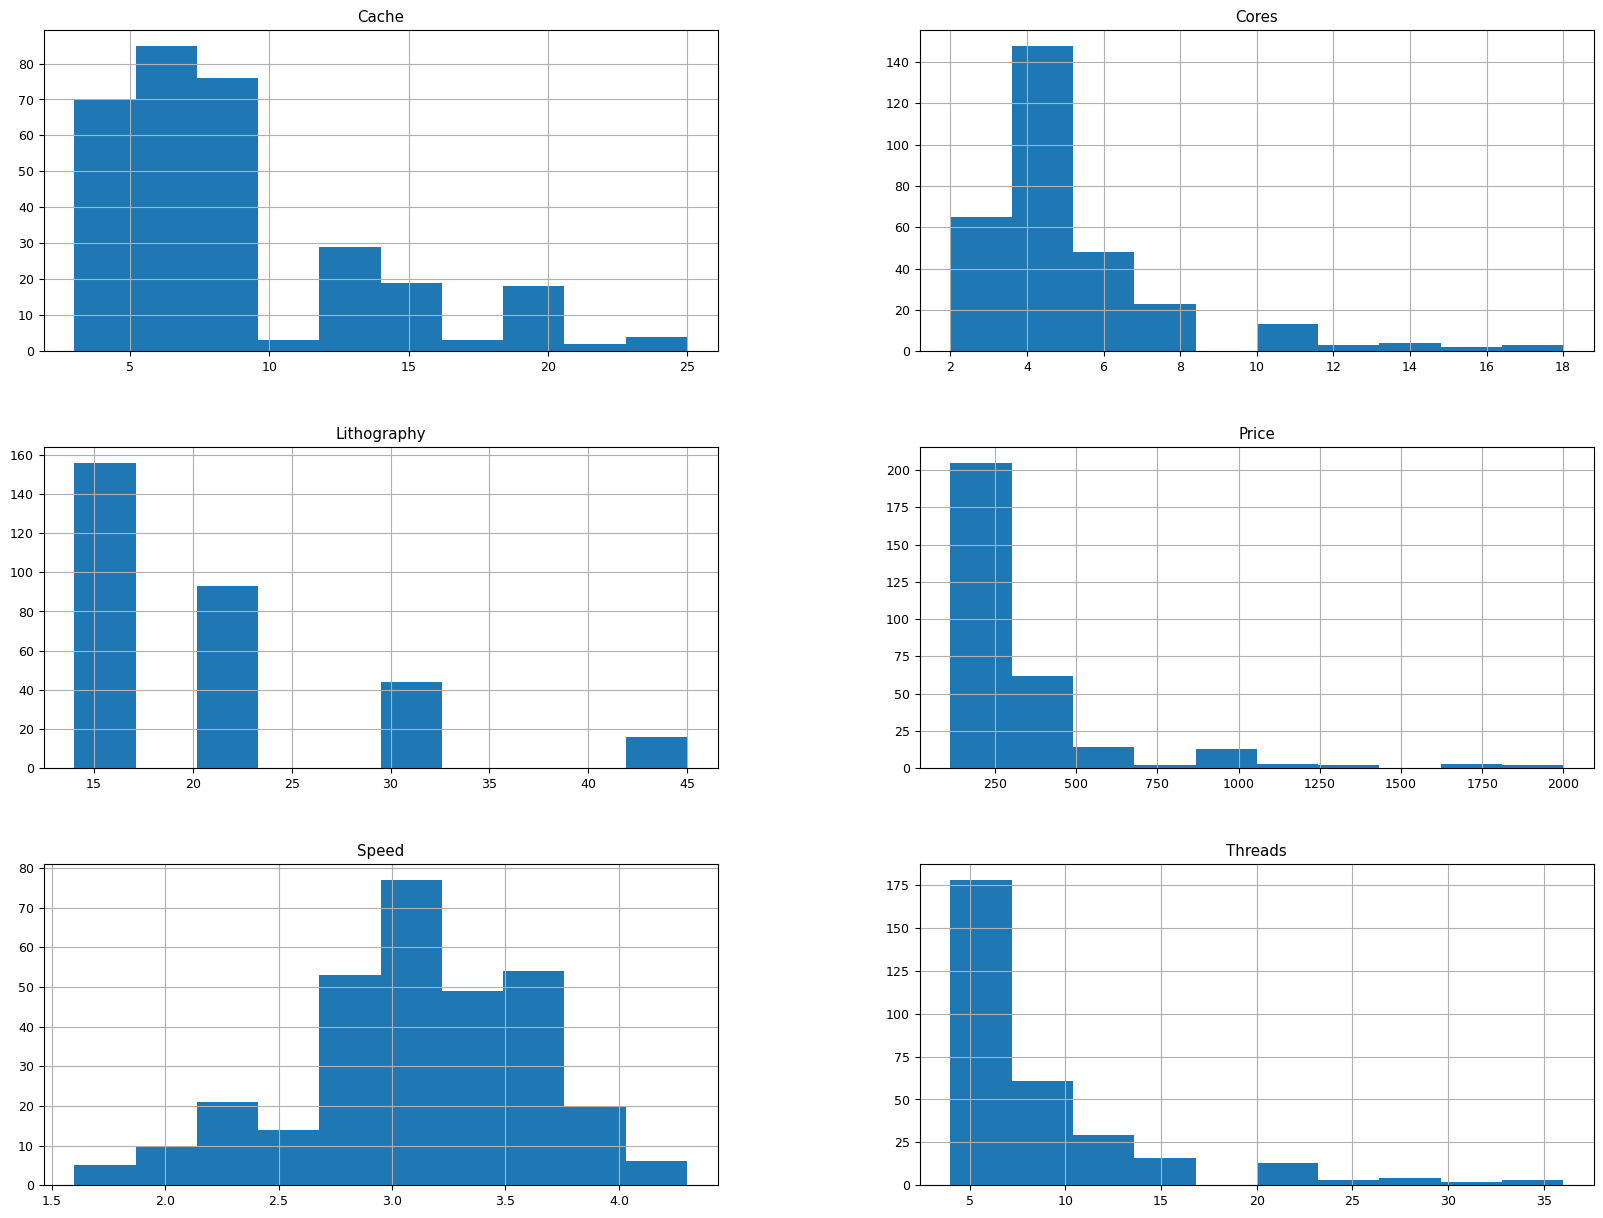

In [1055]:
# visualizing the distribution of the data in histogram
processors.hist(bins=10, figsize=(20,15))
plt.show()

* The distribution of Cache, Cores, Lithography, Price, and Threads is skewed left.
* The distribution of Speed if symmetric.
* The data range for Cache is between 3 and 25.
* The data range for Cores is between 2 and 18.
* The data range for Lithography is between 14 and 45.
* The data range for Price is between 133 and 1999.
* The data range for Speed is between 1.6 and 4.3.
* The data range for Threads is between 4 and 36.

### 3. Check Missing Data

In [1016]:
#check missing data
processors.isna().sum()

Speed          0
Cache          0
Cores          0
Threads        0
Lithography    0
Price          3
dtype: int64

* There are only 3 rows with 'Price (USD)' value missing. Hence, the rows with missing values can be dropped.

In [1017]:
# drop rows with missing data
processors = processors.dropna()
processors.shape

(306, 6)

* After dropping the missing data, we are left with 306 rows of data.

### 4. Feature Selection
**Check Correlation**

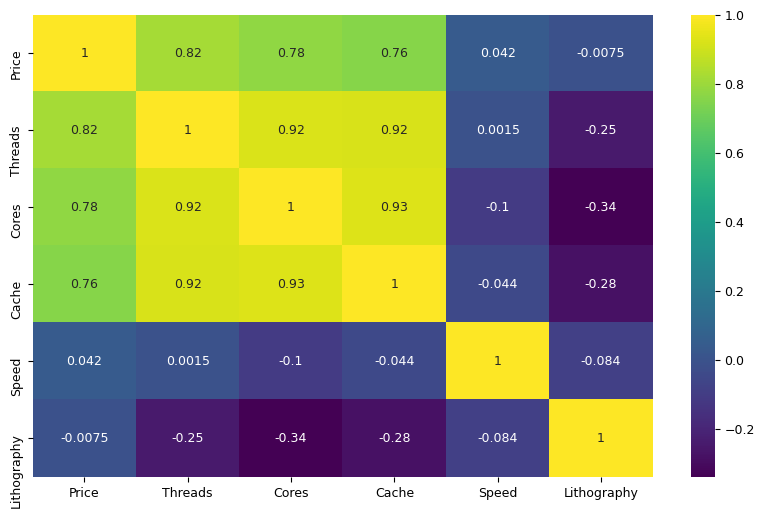

In [1018]:
#Correlation matrix
k = 6 #number of variables for heatmap
cols = processors.corr().nlargest(k, 'Price')['Price'].index
cm = processors[cols].corr()
plt.figure(figsize=(10,6))
_=sns.heatmap(cm, annot=True, cmap = 'viridis')

* The box with brighter colour indicates positive correlation whereas the box with darker colour indicates negative correlation.
* Based on the heatmap, we can see that 'Thread' (0.82), 'Cores' (0.78), and 'Cache' (0.76) have strong positive correlation with 'Price'.
* The 'Speed' (0.042) and 'Lithography' (-0.0075) has almost no correlation with 'Price, hence these two feature columns will be dropped. 

In [1019]:
processors = processors.drop(['Speed','Lithography'],axis=1)
processors.columns

Index(['Cache', 'Cores', 'Threads', 'Price'], dtype='object')

In [1020]:
processors.shape

(306, 4)

* After dropping the features that have no correlation with the 'Price', the data has only 4 columns which are 'Cache', 'Cores', 'Threads', and 'Price'.

### 5. Split Dataset to Train/Dev/Test (70/15/15)

In [1021]:
# split to train/dev/test (70/15/15)
train, dev, test = np.split(processors.sample(frac=1), [int(.7*len(processors)), int(.85*len(processors))])

# split predictors (x) and target (y) variables
x_train = train.drop(['Price'],axis=1)
y_train = train['Price']

x_dev = dev.drop(['Price'],axis=1)
y_dev = dev['Price']

x_test = test.drop(['Price'],axis=1)
y_test = test['Price']

In [1022]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_dev shape: ", x_dev.shape)
print("y_dev shape: ", y_dev.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (214, 3)
y_train shape:  (214,)
x_dev shape:  (46, 3)
y_dev shape:  (46,)
x_test shape:  (46, 3)
y_test shape:  (46,)


* Train dataset has 214 rows of data.
* Dev dataset has 46 rows of data.
* Test dataset hase 46 rows of data

### 6. Feature Scaling
All feature columns has different set of range. This can be seen from the different values of their min and max. Due to the different set of range present in the dataset, it is necessary to scale the data so that all the data are in the same range. Feature scaling is also done to ensure that all features are equally weighted.  

In order to choose the suitable data scaling method, the presence of outliers in the dataset is checked.

**Check Outliers**

In [1023]:
x_train.describe()

,Cache,Cores,Threads
count,214.000000,214.000000,214.000000
mean,8.485981,4.869159,7.971963
std,5.003442,2.966429,6.349682
min,3.000000,2.000000,4.000000
25%,6.000000,4.000000,4.000000
50%,8.000000,4.000000,4.000000
75%,9.000000,6.000000,8.000000
max,25.000000,18.000000,36.000000


* There is a huge difference between the 75% and max in columns 'Cache', 'Cores', and 'Threads', suggesting there are outliers in our dataset. To have better understanding of the data, boxplot is plotted to visualize the outliers.

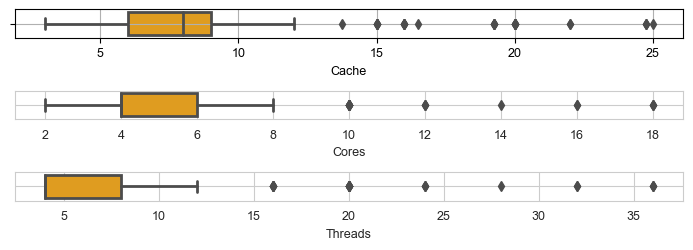

In [1024]:
# boxplot to visualize outliers
l = x_train.columns.values
number_of_columns=1
number_of_rows = 3
plt.figure(figsize=(7*number_of_columns,number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x_train[l[i]],color='orange',orient='h')
    plt.tight_layout()
    plt.grid("True")

* Based on the boxplot, all feature columns shows the presence of outliers.
* Due to the presence of large amount of outliers, the data scaling method chosen should be robust to outliers.
* In this case, the Robust Scaler is the suitable data scaling method for this dataset.

In [1025]:
# fit scaler on x_train dataset
scaler = RobustScaler()
datascaler = scaler.fit(x_train)

#### Visualize the data scaling

In [1026]:
data_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns=['Cache','Cores','Threads'])
data_scaled.describe()

,Cache,Cores,Threads
count,214.000000,214.000000,214.000000
mean,0.161994,0.434579,0.992991
std,1.667814,1.483215,1.587420
min,-1.666667,-1.000000,0.000000
25%,-0.666667,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.333333,1.000000,1.000000
max,5.666667,7.000000,8.000000


* Robust Scaler removes the median (indicated by 50%) and scales the data based on the quantile range which is the range between the first quartile (indicated by 25%) and the third quartile (indicated by 75%).

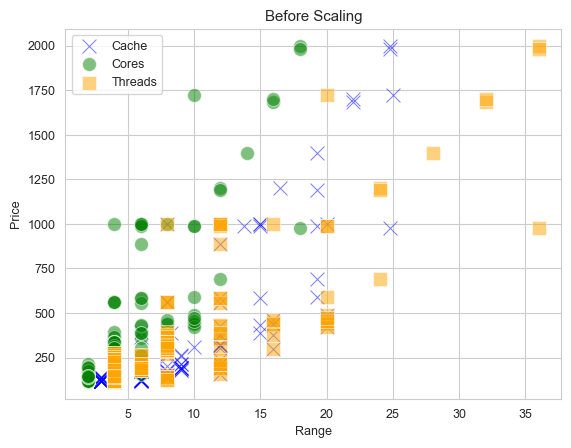

In [1027]:
plt.title("Before Scaling")
sns.set_style('whitegrid')
sns.scatterplot(x_train['Cache'], y_train, marker='x',s=100, label="Cache", color='blue', alpha=0.5)
sns.scatterplot(x_train['Cores'], y_train, marker='o',s=100, label="Cores", color='green', alpha=0.5)
sns.scatterplot(x_train['Threads'], y_train, marker='s',s=100, label="Threads", color='orange', alpha=0.5)
plt.xlabel("Range")
plt.grid("True")
plt.show()

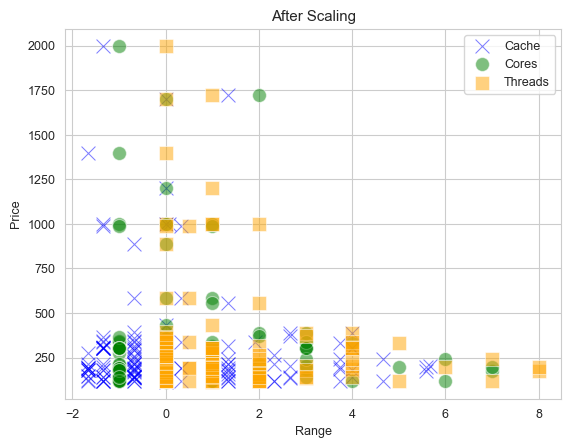

In [1028]:
plt.title("After Scaling")
sns.set_style('whitegrid')
sns.scatterplot(data_scaled['Cache'], y_train,marker='x',s=100, label="Cache", color='blue', alpha=0.5)
sns.scatterplot(data_scaled['Cores'], y_train,marker='o',s=100, label="Cores", color='green', alpha=0.5)
sns.scatterplot(data_scaled['Threads'], y_train,marker='s',s=100, label="Threads", color='orange', alpha=0.5)
plt.xlabel("Range")
plt.grid("True")
plt.show()

* As displayed in the graph above, the range of all the feature columns are scaled to approximately the same range.
* The scaler that is fitted to the x_train dataset is used to transform the x_train, x_dev, and x_test datasets to ensure consistency.

In [1029]:
# transform x_train, x_dev, and x_test datasets  
x_train = datascaler.transform(x_train)
x_dev = datascaler.transform(x_dev)
x_test = datascaler.transform(x_test)

## Modelling
**1. K-Nearest Neighbour**

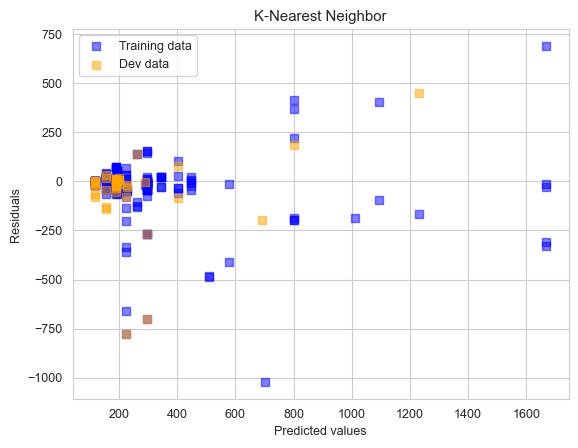

Train score:  0.755573
Dev score:  0.334509
RMSE:  183.01931


In [1030]:
# K-Nearest Neighbor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_dev)


plt.title("K-Nearest Neighbor")
trainknngraph=knn.predict(x_train)
devknngraph=y_pred
plt.scatter(trainknngraph, trainknngraph - y_train, c = "blue", marker = "s", label = "Training data", alpha=0.5)
plt.scatter(devknngraph, devknngraph - y_dev, c = "orange", marker = "s", label = "Dev data", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.grid("True")
plt.show()

knntrain = round(knn.score(x_train,y_train),6)

print("Train score: ", knntrain)
print("Dev score: ", round(knn.score(x_dev,y_dev),6))
print("RMSE: ", round(mean_squared_error(y_dev,y_pred,squared=False),6))

**K-Nearest Neighbour with GridSearchCV**

Fitting 2 folds for each of 480 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    1.2s finished


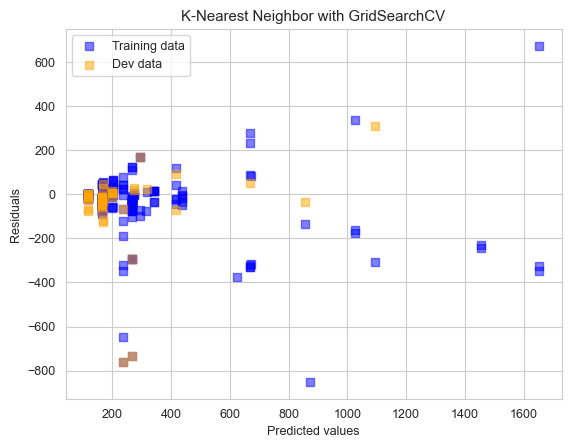

GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=True)
Dev score:  0.733894
RMSE:  175.649767
Best parameters:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [1031]:
n_neighbors = list(range(1,20,2))
p=[1,2]
weights = ['uniform','distance']
algorithm = ['ball_tree', 'kd_tree', 'brute']
metric = ['euclidean','manhattan','chebyshev','minkowski']

hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights, algorithm=algorithm, metric=metric)
gridknn = GridSearchCV(KNeighborsRegressor(), hyperparameters, verbose=True, n_jobs=-1, cv=2)
g = gridknn.fit(x_train,y_train)
y_pred = g.predict(x_dev)


plt.title("K-Nearest Neighbor with GridSearchCV")
trainknngraph=gridknn.predict(x_train)
devknngraph=y_pred
plt.scatter(trainknngraph, trainknngraph - y_train, c = "blue", marker = "s", label = "Training data", alpha=0.5)
plt.scatter(devknngraph, devknngraph - y_dev, c = "orange", marker = "s", label = "Dev data", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.grid("True")
plt.show()

knndev = round(gridknn.best_score_,6)

print(g)
print("Dev score: ", knndev)
print("RMSE: ", round(mean_squared_error(y_dev,y_pred,squared=False),6))
print("Best parameters: ", gridknn.best_params_)

**2. Decision Tree**

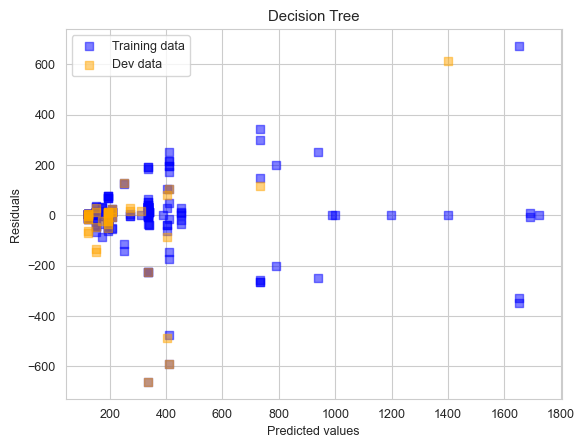

Train score:  0.858568
Dev score:  0.323308
RMSE:  184.55311


In [1032]:
dt = DecisionTreeRegressor(random_state=seed)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_dev)

plt.title("Decision Tree")
traindtgraph=dt.predict(x_train)
devdtgraph=y_pred
plt.scatter(traindtgraph, traindtgraph - y_train, c = "blue", marker = "s", label = "Training data", alpha=0.5)
plt.scatter(devdtgraph, devdtgraph - y_dev, c = "orange", marker = "s", label = "Dev data", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.grid("True")
plt.show()

dttrain = round(dt.score(x_train,y_train),6)

print("Train score: ", dttrain)
print("Dev score: ", round(dt.score(x_dev,y_dev),6))
print("RMSE: ", round(mean_squared_error(y_dev,y_pred,squared=False),6))

**Decision Tree with GridSearchCV**

Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished


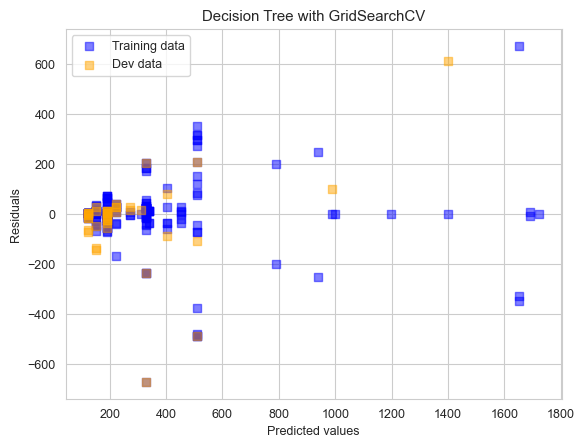

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=122), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=True)
Dev score:  0.769771
RMSE:  168.309096
Best parameters:  {'criterion': 'mse', 'max_depth': 6, 'max_features': 'sqrt', 'splitter': 'random'}


In [1033]:
criterion = ['mse', 'friedman_mse', 'mae']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2']
max_depth = list(range(0,20,2))

hyperparameters = dict(criterion=criterion, splitter=splitter, max_features=max_features, max_depth=max_depth)
griddt = GridSearchCV(DecisionTreeRegressor(random_state=seed), hyperparameters, verbose=True, n_jobs=-1, cv=2)
g = griddt.fit(x_train, y_train)
y_pred = g.predict(x_dev)

plt.title("Decision Tree with GridSearchCV")
traindtgraph=griddt.predict(x_train)
devdtgraph=y_pred
plt.scatter(traindtgraph, traindtgraph - y_train, c = "blue", marker = "s", label = "Training data", alpha=0.5)
plt.scatter(devdtgraph, devdtgraph - y_dev, c = "orange", marker = "s", label = "Dev data", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.grid("True")
plt.show()

dtdev = round(griddt.best_score_,6)

print(g)
print("Dev score: ", dtdev)
print("RMSE: ", round(mean_squared_error(y_dev,y_pred,squared=False),6))
print("Best parameters: ", griddt.best_params_)

**3. Random Forest**

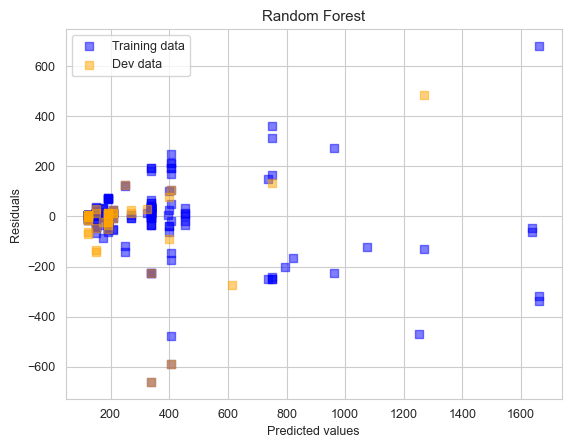

Train score:  0.843438
Dev score:  0.452601
RMSE:  165.988438


In [1034]:
rf = RandomForestRegressor(random_state=seed)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_dev)

plt.title("Random Forest")
trainrfgraph=rf.predict(x_train)
devrfgraph=y_pred
plt.scatter(trainrfgraph, trainrfgraph - y_train, c = "blue", marker = "s", label = "Training data", alpha=0.5)
plt.scatter(devrfgraph, devrfgraph - y_dev, c = "orange", marker = "s", label = "Dev data", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.grid("True")
plt.show()

rftrain = round(rf.score(x_train,y_train),6)

print("Train score: ", rftrain)
print("Dev score: ", round(rf.score(x_dev,y_dev),6))
print("RMSE: ", round(mean_squared_error(y_dev,y_pred,squared=False),6))

**Random Forest with GridSearchCV**

Fitting 2 folds for each of 800 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    7.0s finished


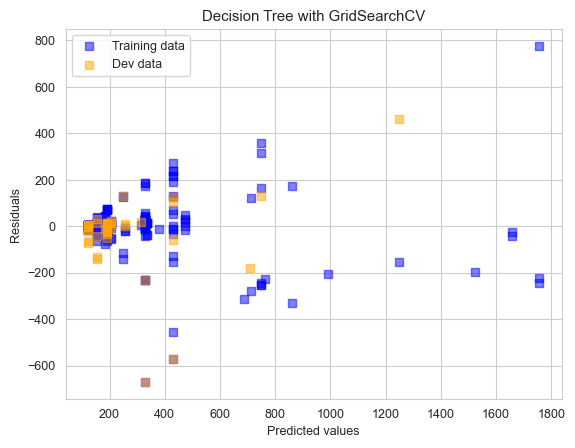

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=122), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]},
             verbose=True)
Dev score:  0.75459
RMSE:  161.314499
Best parameters:  {'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 18}


In [1035]:
n_estimators =list(range(0,20,2))
criterion = ['mse', 'mae']
max_features = ['sqrt', 'log2']
max_depth = list(range(0,20,2))
bootstrap = ['True','False']

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features, max_depth=max_depth, bootstrap=bootstrap)
gridrf = GridSearchCV(RandomForestRegressor(random_state=seed), hyperparameters, verbose=True, n_jobs=-1, cv=2)
g = gridrf.fit(x_train, y_train)
y_pred = g.predict(x_dev)

plt.title("Decision Tree with GridSearchCV")
trainrfgraph=gridrf.predict(x_train)
devrfgraph=y_pred
plt.scatter(trainrfgraph, trainrfgraph - y_train, c = "blue", marker = "s", label = "Training data", alpha=0.5)
plt.scatter(devrfgraph, devrfgraph - y_dev, c = "orange", marker = "s", label = "Dev data", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.grid("True")
plt.show()

rfdev = round(gridrf.best_score_,6)

print(g)
print("Dev score: ", rfdev)
print("RMSE: ", round(mean_squared_error(y_dev,y_pred,squared=False),6))
print("Best parameters: ", gridrf.best_params_)


## Evaluation
In this section, the performance of the models are evaluated using the test dataset. The hyperparameters of the models are set to the values found in the Modelling section using GridSearchCV.<br>
The following business question will also be answered:
1. Can the price of processor be predicted based on its features with a reasonable accuracy?
2. Which model provides higher accuracy for predicting the price of the processor?
<br><br>

**K-Nearest Neighbor**

In [1038]:
knn = KNeighborsRegressor(algorithm=gridknn.best_params_['algorithm'], metric=gridknn.best_params_['metric'], n_neighbors=gridknn.best_params_['n_neighbors'], p=gridknn.best_params_['p'], weights=gridknn.best_params_['weights'])
knn.fit(x_train,y_train)
knn_y_pred = knn.predict(x_test)

knnR2 = round(r2_score(y_test,knn_y_pred),6)
knnRMSE = round(mean_squared_error(y_test,knn_y_pred,squared=False),6)

**Decision Tree**

In [1039]:
dt = DecisionTreeRegressor(random_state=seed, criterion=griddt.best_params_['criterion'], max_depth=griddt.best_params_['max_depth'], max_features=griddt.best_params_['max_features'], splitter=griddt.best_params_['splitter'])
dt.fit(x_train,y_train)
dt_y_pred = dt.predict(x_test)

dtR2 = round(r2_score(y_test,dt_y_pred),6)
dtRMSE = round(mean_squared_error(y_test,dt_y_pred,squared=False),6)

**Random Forest**

In [1040]:
rf = RandomForestRegressor(random_state=seed, bootstrap=gridrf.best_params_['bootstrap'], criterion=gridrf.best_params_['criterion'], max_depth=gridrf.best_params_['max_depth'], max_features=gridrf.best_params_['max_features'], n_estimators=gridrf.best_params_['n_estimators'])
rf.fit(x_train,y_train)
rf_y_pred = rf.predict(x_test)

rfR2 = round(r2_score(y_test,rf_y_pred),6)
rfRMSE = round(mean_squared_error(y_test,rf_y_pred,squared=False),6)

### Results
**1. Can the price of processor be predicted based on its features with a reasonable accuracy?**


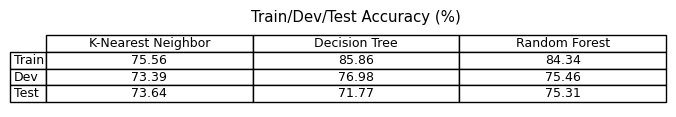

In [1058]:
# display train/dev/test accuracy of all models
allAccuracy = pd.DataFrame({"K-Nearest Neighbor":[knntrain,knndev,knnR2],"Decision Tree":[dttrain,dtdev,dtR2], "Random Forest":[rftrain,rfdev,rfR2]},index=['Train','Dev','Test'])
plt.rcdefaults()
fig = plt.figure(figsize = (8, 1))
plt.rc('font', size=9)
plt.rc('lines', linewidth=2)
ax = fig.add_subplot(1,1,1)

ax.table(cellText = np.round((allAccuracy.values*100),2),
          rowLabels = allAccuracy.index,
          colLabels = allAccuracy.columns,
          loc = "center",
          cellLoc="center",
         )
ax.set_title("Train/Dev/Test Accuracy (%)")
ax.axis("off");

* The table shows the accuracy for all models in train, dev, and test.
* All of the models shows high accuracy of prediction which is above 70%.
* Hence, we conclude that the it is possible to predict the price of the processor based on its features with reasonable accuracy.

**2. Which model provides higher accuracy for predicting the price of the processor?**

The scatter plots for the actual values and predicted values for K-Nearest Neighbour, Decision Tree, and Random Forest are plotted.

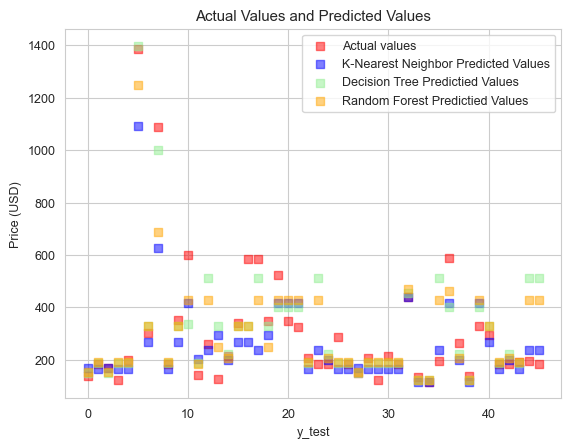

In [1041]:
# plot actual values and predicted values
plt.scatter(list(range(0,y_test.shape[0],1)),y_test,c='red',alpha=0.5, label='Actual values', marker='s')
plt.scatter(list(range(0,y_test.shape[0],1)),knn_y_pred,c='blue',alpha=0.5,label='K-Nearest Neighbor Predicted Values', marker='s')
plt.scatter(list(range(0,y_test.shape[0],1)),dt_y_pred,c='lightgreen',alpha=0.5, label='Decision Tree Predictied Values',marker='s')
plt.scatter(list(range(0,y_test.shape[0],1)),rf_y_pred,c='orange',alpha=0.5, label='Random Forest Predictied Values',marker='s')
plt.ylabel("Price (USD)")
plt.xlabel("y_test")
plt.legend(loc = "upper right")
plt.title("Actual Values and Predicted Values")
plt.grid("True")
plt.show()

* To have a better picture of the result accuracy, the residuals of the predicted values are plotted in the scatter plot.

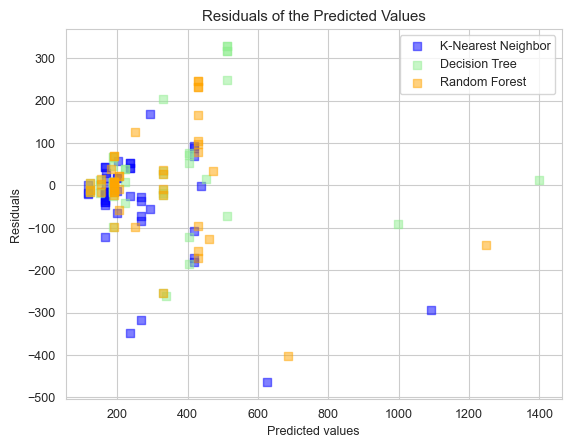

In [1042]:
plt.scatter(knn_y_pred, knn_y_pred - y_test, c = "blue", marker = "s", label = "K-Nearest Neighbor", alpha=0.5)
plt.scatter(dt_y_pred, dt_y_pred - y_test, c = "lightgreen", marker = "s", label = "Decision Tree", alpha=0.5)
plt.scatter(rf_y_pred, rf_y_pred - y_test, c = "orange", marker = "s", label = "Random Forest", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals of the Predicted Values")
plt.legend(loc = "upper right")
plt.grid("True")
plt.show()

* From the scatter plot, it is observed that the K-Nearest Neighbor has 3 predicted values with residual values of more than 300 whereas Decision Tree has 2 predicted values with residual values of more than 300. Random Forest has only 1 predicted value with residual values of more than 300.

* Compared to K-Nearest Neighbor and Decision Tree, the values predicted by Random Forest are more closer to the residual value of 0, signifying its accuracy is the highest amongst the three models.

* The R Squared (R2) and the R Mean Squared Error (RMSE) of the 3 models are tabulated to confirm the observation on the scatter plot.

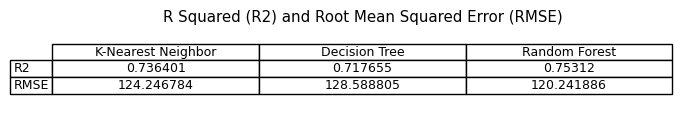

In [1043]:
# display r squared and rmse of all models predicted with test dataset
result = pd.DataFrame({"K-Nearest Neighbor":[knnR2,knnRMSE],"Decision Tree":[dtR2,dtRMSE], "Random Forest":[rfR2,rfRMSE]},index=['R2','RMSE'])

plt.rcdefaults()
fig = plt.figure(figsize = (8, 1))
plt.rc('font', size=9)
plt.rc('lines', linewidth=2)
ax = fig.add_subplot(1,1,1)

ax.table(cellText = result.values,
          rowLabels = result.index,
          colLabels = result.columns,
          loc = "center",
          cellLoc="center"
         )

ax.set_title("R Squared (R2) and Root Mean Squared Error (RMSE)")
ax.axis("off");

* Random Forest has the highest R2 value at 0.75 and the lowest RMSE value at 120.24 compared to K-Nearest Neighbor and Decision Tree, indicating that it is the most accurate model amongst the three machine learning algorithms.
* Hence, we will choose Random Forest as our model to be deployed for processor price prediction.


# H. Conclusion

**Advantage and Limitation on Selected Model**<br>
Random Forest is a powerful machine learning model that has high accuracy due to its ensemble learning method (Bakshi, 2020). Random Forest is able to solve both classification and regression problem. In our case, the Random Forest is used to solve the regression problem of predicting the price of the processor based on the given features. Besides, Random Forest also reduces data overfitting (Bahnsen, 2017) which is a common problem in small dataset. Due to this characteristic, Random Forest is able achieve higher accuracy in small dataset than K-Nearest Neighbor or Decision Tree. 

Despite the benefits, Random Forest has its own limitation where its hyperparameters has to be tune finely to achieve higher accuracy. It also has longer training time compared to Decision Tree as it generates a lot of trees compared to Decision Tree where only one tree is generated. 


**Future Improvement**<br>
In order to improve the accuracy of the processor price prediction, deep learning such as neural network can be applied. According to a study done by Olson, Wyner and Berk (2018), deep neural networks can generalize well even on small datasets and it has computational advantages than larger datasets where the time needed for experimentation is reduced. 

Moreover, our model can also be expanded to predict the price of processor from different processor brands besides Intel so users have more options in selecting the types of processor they wanted for price prediction.

# I. Reference
Bahnsen, A. (2017) Machine Learning Algorithms: Introduction to Random Forests, Dataversity. Available at: https://www.dataversity.net/machine-learning-algorithms-introduction-random-forests/ (Accessed: 8 September 2020).

Bakshi, C. (2020) Random Forest Regression, Medium. Available at: https://levelup.gitconnected.com/random-forest-regression-209c0f354c84 (Accessed: 10 September 2020).

Brownlee, J. (2020) How to Scale Data With Outliers for Machine Learning, Machine Learning Mastery. Available at: https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/#:~:text=Outliers%20can%20skew%20a%20probability,the%20presence%20of%20the%20outliers.&text=This%20is%20called%20robust%20standardization%20or%20robust%20data%20scaling (Accessed: 26 August 2020).

Ioannides, A. (2019) Deploying Python ML Models with Flask, Docker and Kubernetes. Available at: https://alexioannides.com/2019/01/10/deploying-python-ml-models-with-flask-docker-and-kubernetes/ (Accessed: 10 September 2020).

Kumar, S. (2019) Everything You Need To Know About Train/Dev/Test Split — What, How and Why, Medium. Available at: https://medium.com/@snji.khjuria/everything-you-need-to-know-about-train-dev-test-split-what-how-and-why-6ca17ea6f35#:~:text=If%20the%20dev%2Ftest%20set,data%20mismatch%20problem%20as%20well (Accessed: 26 August 2020).

Olson, M., Wyner, A. J. and Berk, R. (2018) ‘Modern neural networks generalize on small data sets’, Advances in Neural Information Processing Systems, 2018-December(NeurIPS), pp. 3619–3628.

Statistics Solutions (n.d.) Missing Values in Data. Available at: https://www.statisticssolutions.com/missing-values-in-data/#:~:text=Handling%20Missing%20Values&text=In%20statistical%20language%2C%20if%20the,do%20imputation)%20and%20replace%20them (Accessed: 25 August 2020)